In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


from src.helpers import multivariant_analysis, load_csv


FILENAME = "drug_sex_values.csv"
filepath = f"../data/{FILENAME}"

In [24]:
drug_sex_df = load_csv(filepath)

In [25]:
drug_sex_df = drug_sex_df.drop(columns=['all opioids', 'stimulants', 'cannabis', 'benzodiazepine'])

In [26]:
drug_sex_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         164 non-null    object 
 1   time        164 non-null    int64  
 2   start_time  164 non-null    object 
 3   end_time    164 non-null    object 
 4   value       164 non-null    float64
 5   setting     164 non-null    object 
 6   all drugs   164 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 9.1+ KB


In [27]:
drug_sex_df.head(10)

,sex,time,start_time,end_time,value,setting,all drugs
0,female,1,01/01/2020,01/31/2020,38478.0,ip,4812.0
1,female,1,01/01/2020,01/31/2020,124275.0,ed,18839.0
2,male,1,01/01/2020,01/31/2020,38478.0,ip,5482.0
3,male,1,01/01/2020,01/31/2020,124275.0,ed,18367.0
4,female,2,02/01/2020,02/29/2020,35754.0,ip,4659.0
5,female,2,02/01/2020,02/29/2020,113888.0,ed,17219.0
6,male,2,02/01/2020,02/29/2020,35754.0,ip,4887.0
7,male,2,02/01/2020,02/29/2020,113888.0,ed,17098.0
8,female,3,03/01/2020,03/31/2020,32745.0,ip,4018.0
9,female,3,03/01/2020,03/31/2020,97467.0,ed,14718.0


In [28]:
drug_sex_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         164 non-null    object 
 1   time        164 non-null    int64  
 2   start_time  164 non-null    object 
 3   end_time    164 non-null    object 
 4   value       164 non-null    float64
 5   setting     164 non-null    object 
 6   all drugs   164 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 9.1+ KB


In [29]:
drug_sex_df.describe()

,time,value,all drugs
count,164.000000,164.000000,164.000000
mean,21.000000,63853.109756,9420.329268
std,11.868399,31905.992312,5294.194074
min,1.000000,12461.000000,1692.000000
25%,11.000000,34719.000000,4421.500000
50%,21.000000,45868.500000,6489.500000
75%,31.000000,96730.000000,14640.750000
max,41.000000,124275.000000,18839.000000


In [30]:
male_drug_sex_df = drug_sex_df[drug_sex_df.sex == 'male']
male_drug_sex_df.describe()

,time,value,all drugs
count,82.000000,82.000000,82.000000
mean,21.000000,63853.109756,9547.682927
std,11.904974,32004.316096,5246.483525
min,1.000000,12461.000000,1692.000000
25%,11.000000,34779.750000,4563.000000
50%,21.000000,45868.500000,6489.500000
75%,31.000000,96689.500000,14830.750000
max,41.000000,124275.000000,18367.000000


In [31]:
female_drug_sex_df = drug_sex_df[drug_sex_df.sex == 'female']
female_drug_sex_df.describe()

,time,value,all drugs
count,82.000000,82.000000,82.000000
mean,21.000000,63853.109756,9292.975610
std,11.904974,32004.316096,5370.715482
min,1.000000,12461.000000,1736.000000
25%,11.000000,34779.750000,4254.250000
50%,21.000000,45868.500000,6288.500000
75%,31.000000,96689.500000,14558.750000
max,41.000000,124275.000000,18839.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ValueError: Could not interpret value `all opioids` for parameter `x`

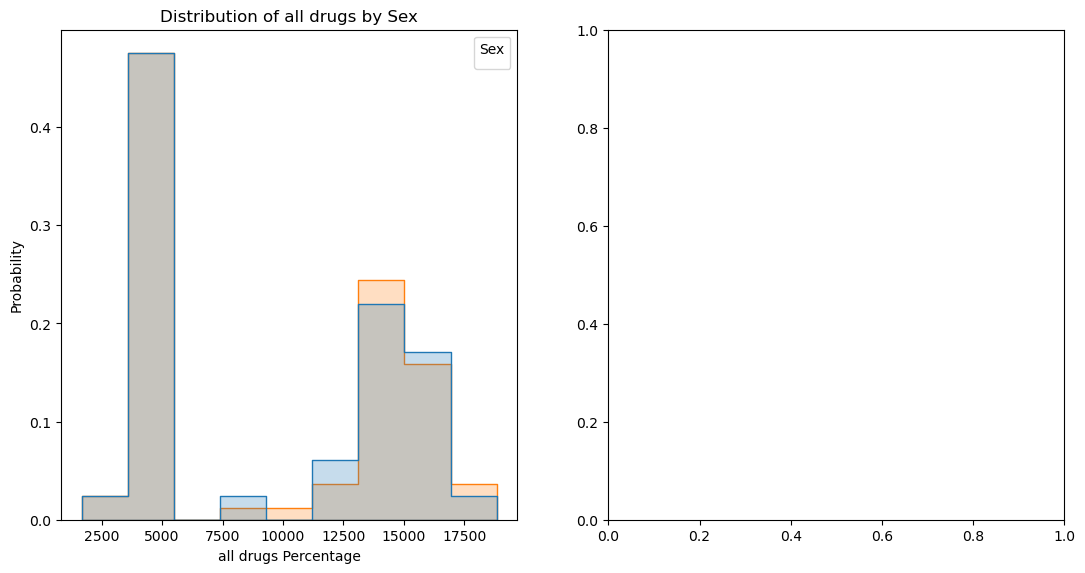

In [32]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 14))

# Plot distributions for key variables
variables = ['all drugs', 'all opioids', 'stimulants', 'cannabis', 'benzodiazepine']

for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.histplot(drug_sex_df, x=var, hue="sex", element="step", stat="probability", common_norm=False)
    plt.title(f'Distribution of {var} by Sex')
    plt.xlabel(f'{var} Percentage')
    plt.ylabel('Probability')
    plt.legend(title='Sex')

plt.tight_layout()
plt.show()

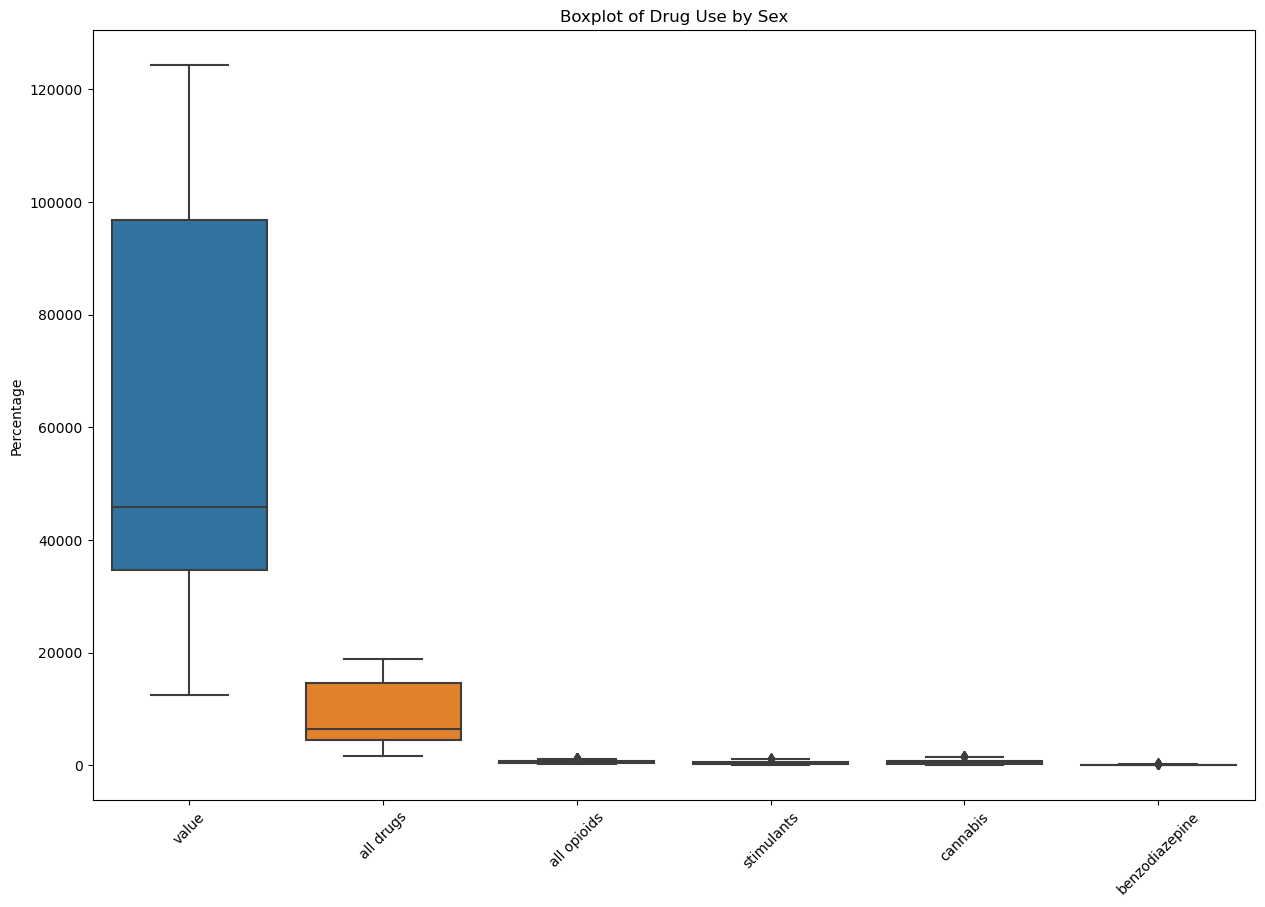

In [ ]:
# Display a boxplot for the data
plt.figure(figsize=(15, 10))
sns.boxplot(data=drug_sex_df.drop(columns=['time', 'sex', 'setting']))
plt.title("Boxplot of Drug Use by Sex")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.show()

In [ ]:
drug_sex_df.columns

Index(['sex', 'time', 'start_time', 'end_time', 'value', 'setting',
       'all drugs', 'all opioids', 'stimulants', 'cannabis', 'benzodiazepine'],
      dtype='object')

value


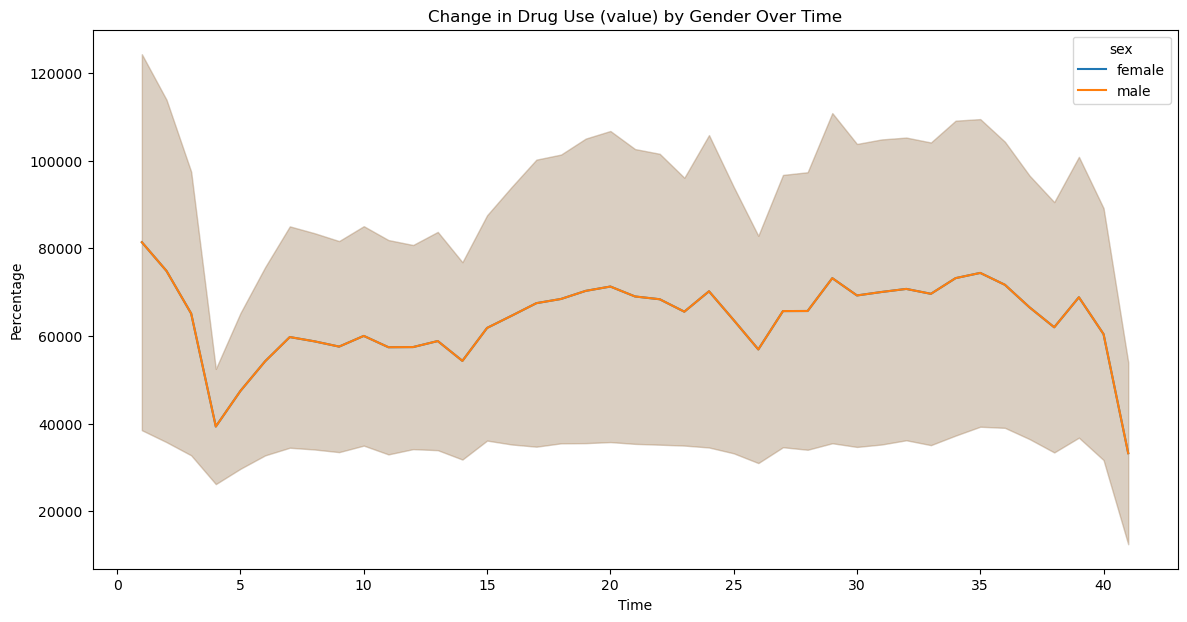

all drugs


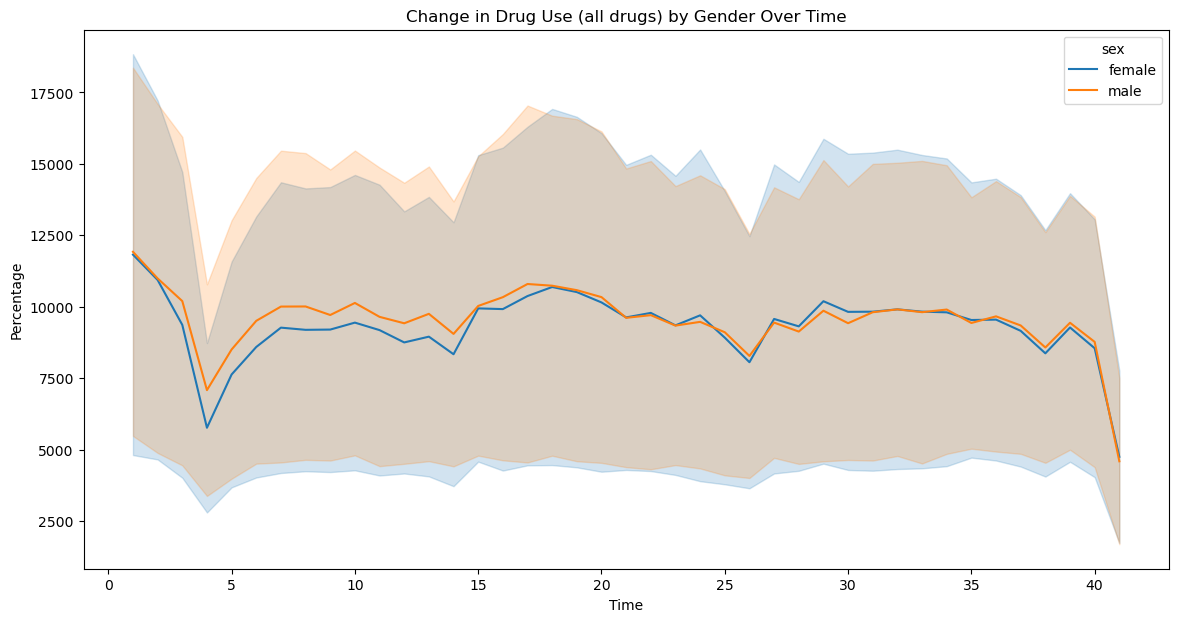

all opioids


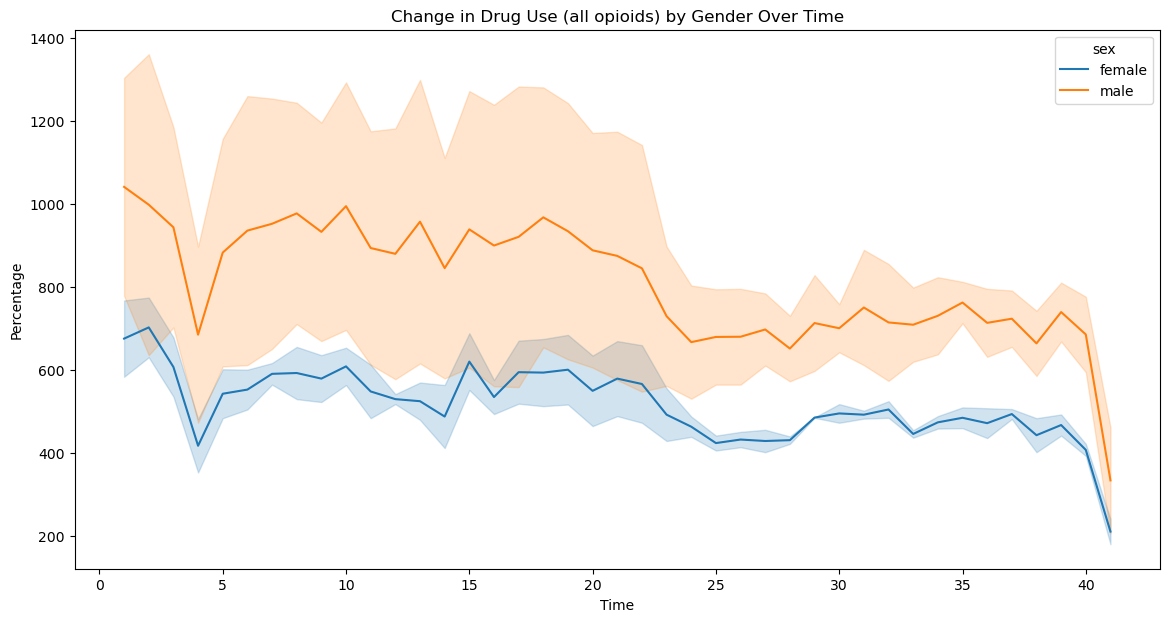

stimulants


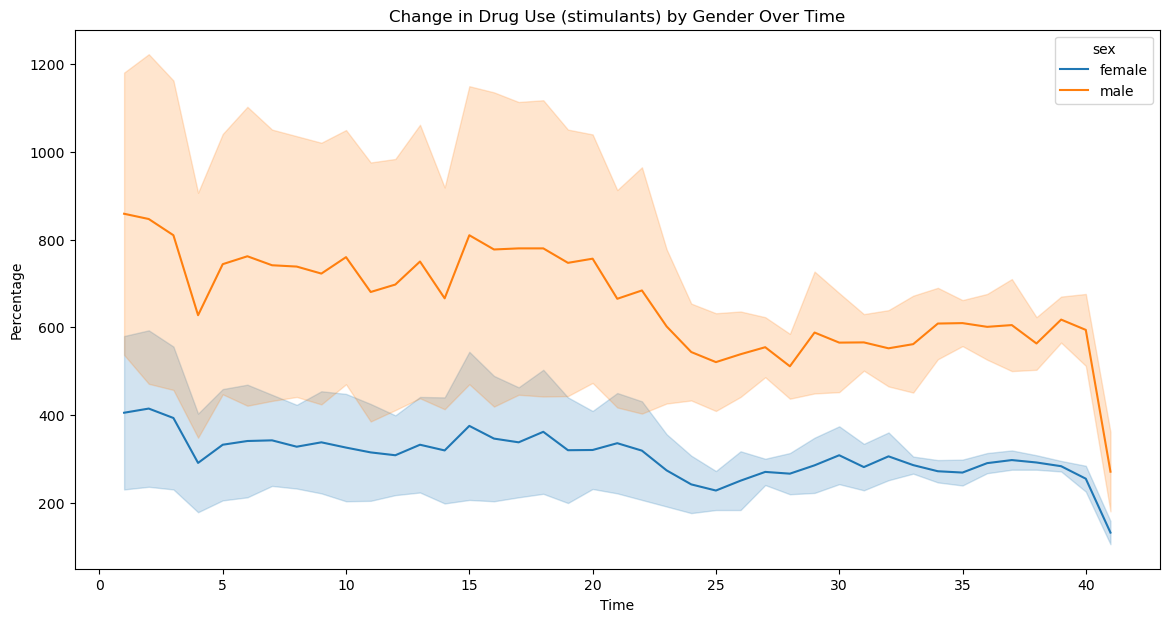

cannabis


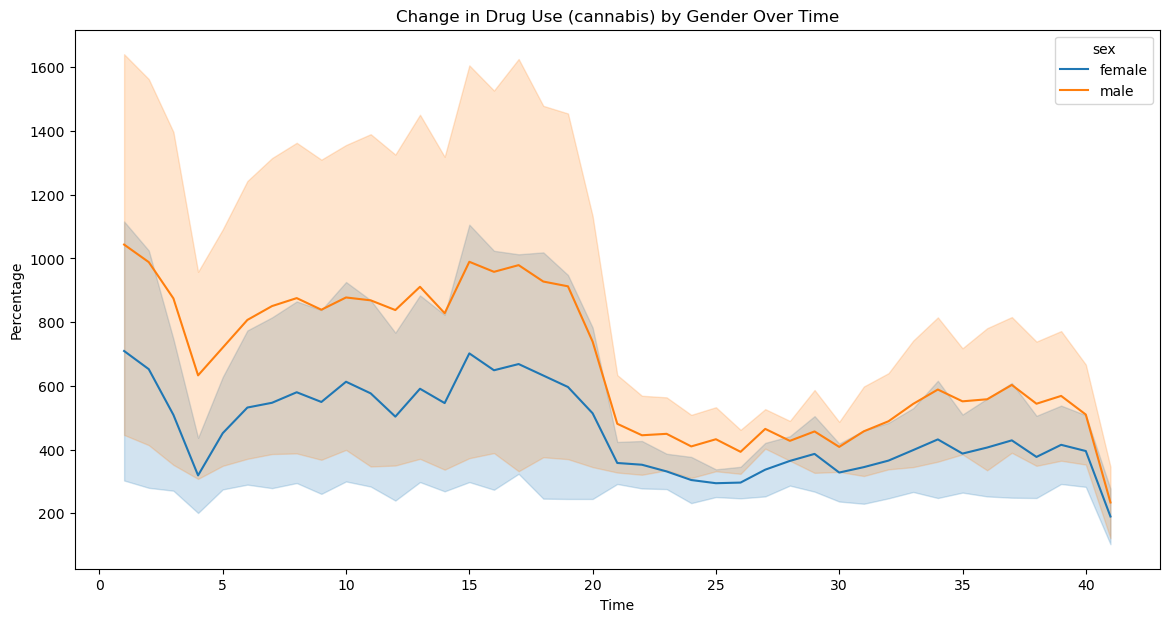

benzodiazepine


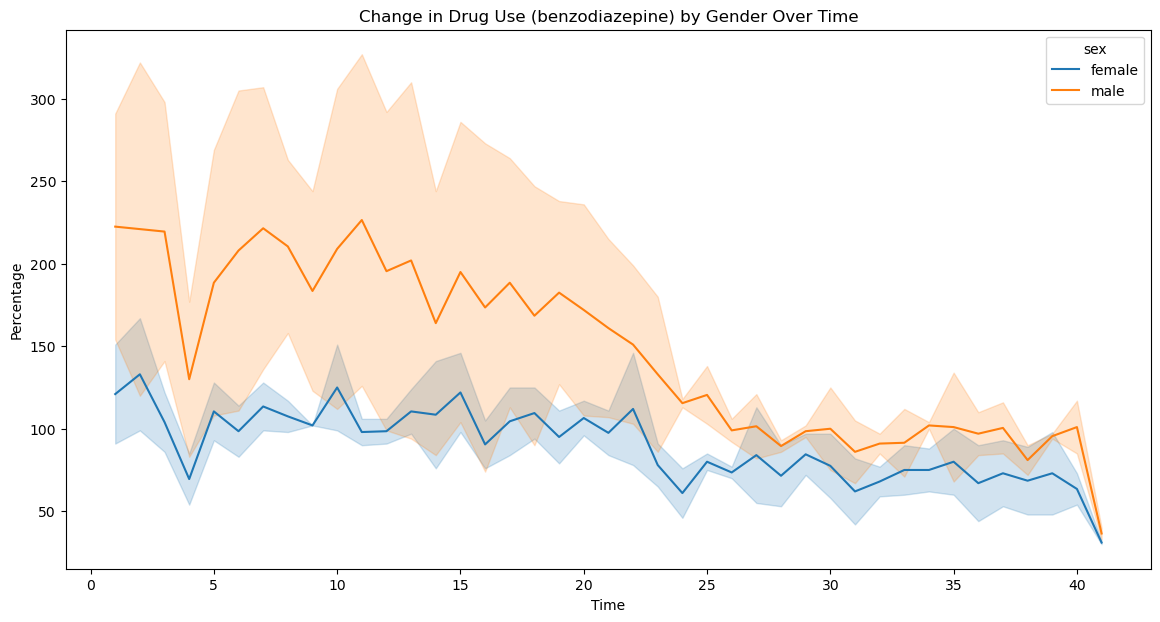

In [ ]:
info_columns_to_exclude = ['sex', 'setting', 'time', 'start_time', 'end_time']
for col in drug_sex_df.columns:
    if col not in info_columns_to_exclude:
        print(col)
        plt.figure(figsize=(14, 7))
        sns.lineplot(data=drug_sex_df, x='time', y=col, hue='sex')
        title = f"Change in Drug Use ({col}) by Gender Over Time"
        plt.title(title)
        plt.ylabel('Percentage')
        plt.xlabel('Time')
        plt.show()

In [ ]:
def plot_kde(df):
    int_vars = df.select_dtypes(include = ['int','float'])
    fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
    axs = axs.flatten()

    for i, var in enumerate (int_vars):
        sns.kdeplot(x=var,data=df,ax=axs[i])

    plt.tight_layout()
    plt.show()

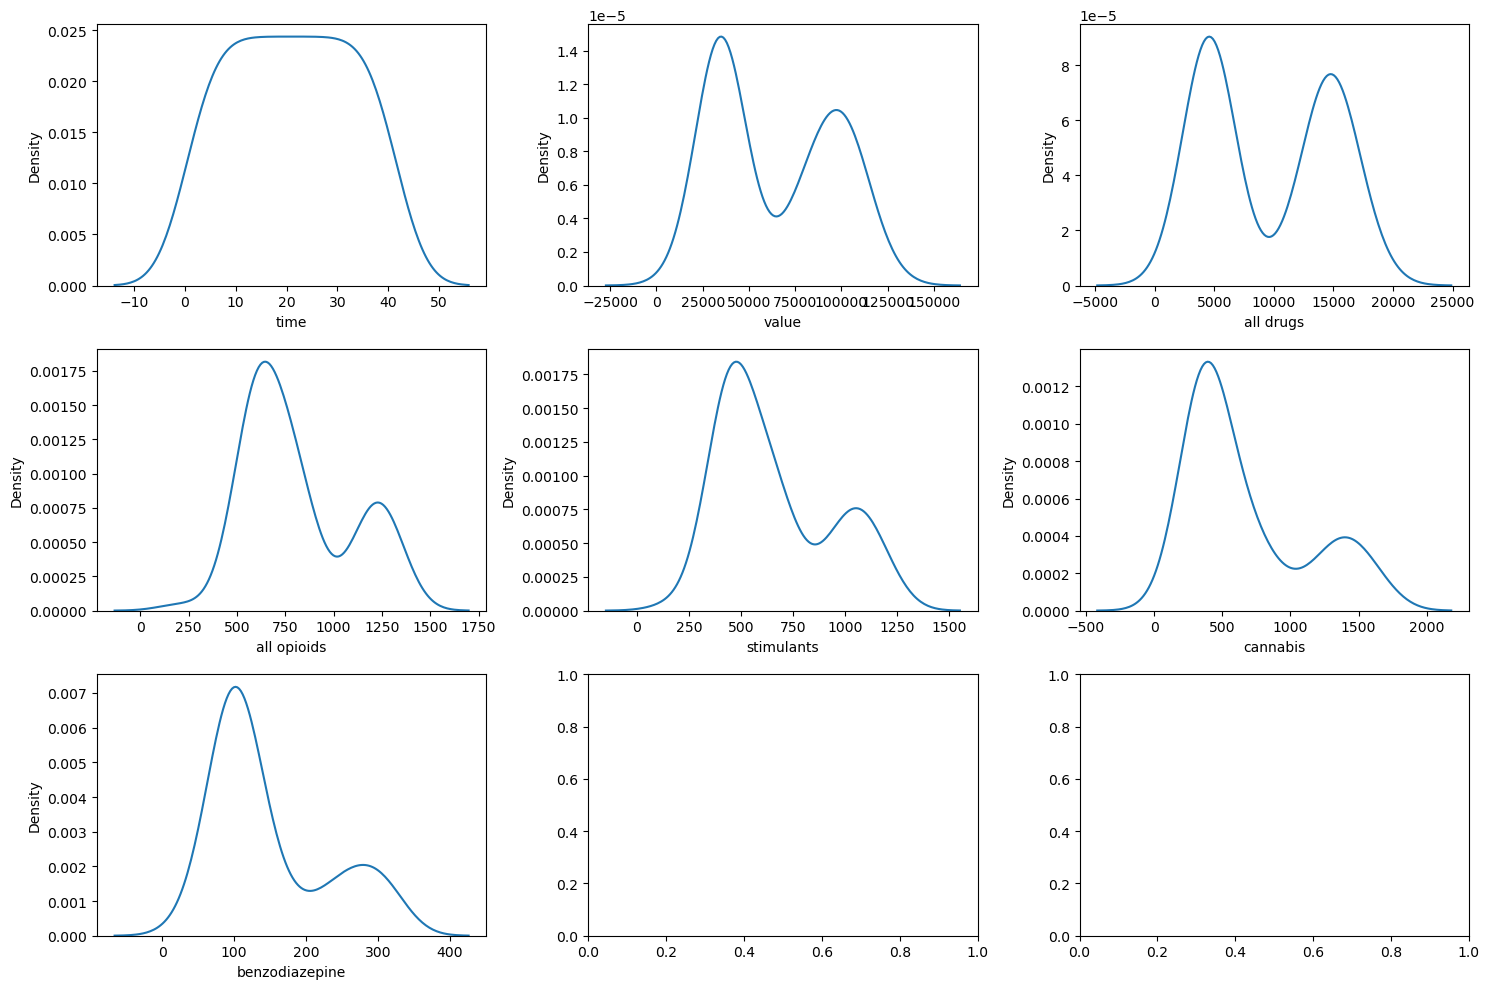

In [ ]:
plot_kde(male_drug_sex_df)

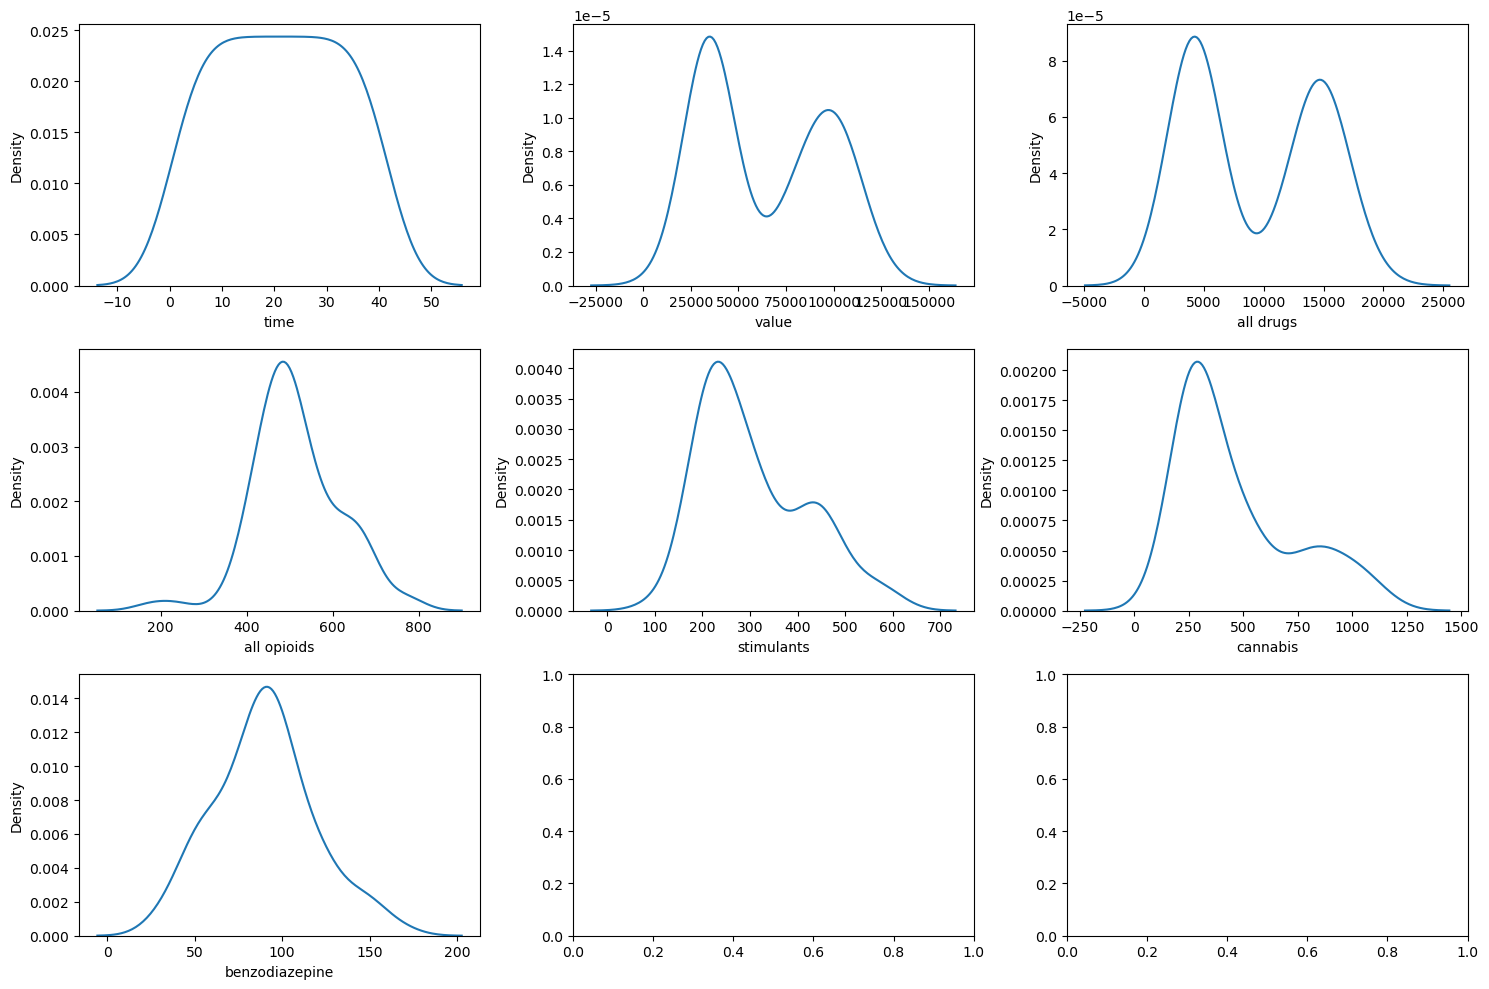

In [ ]:
plot_kde(female_drug_sex_df)

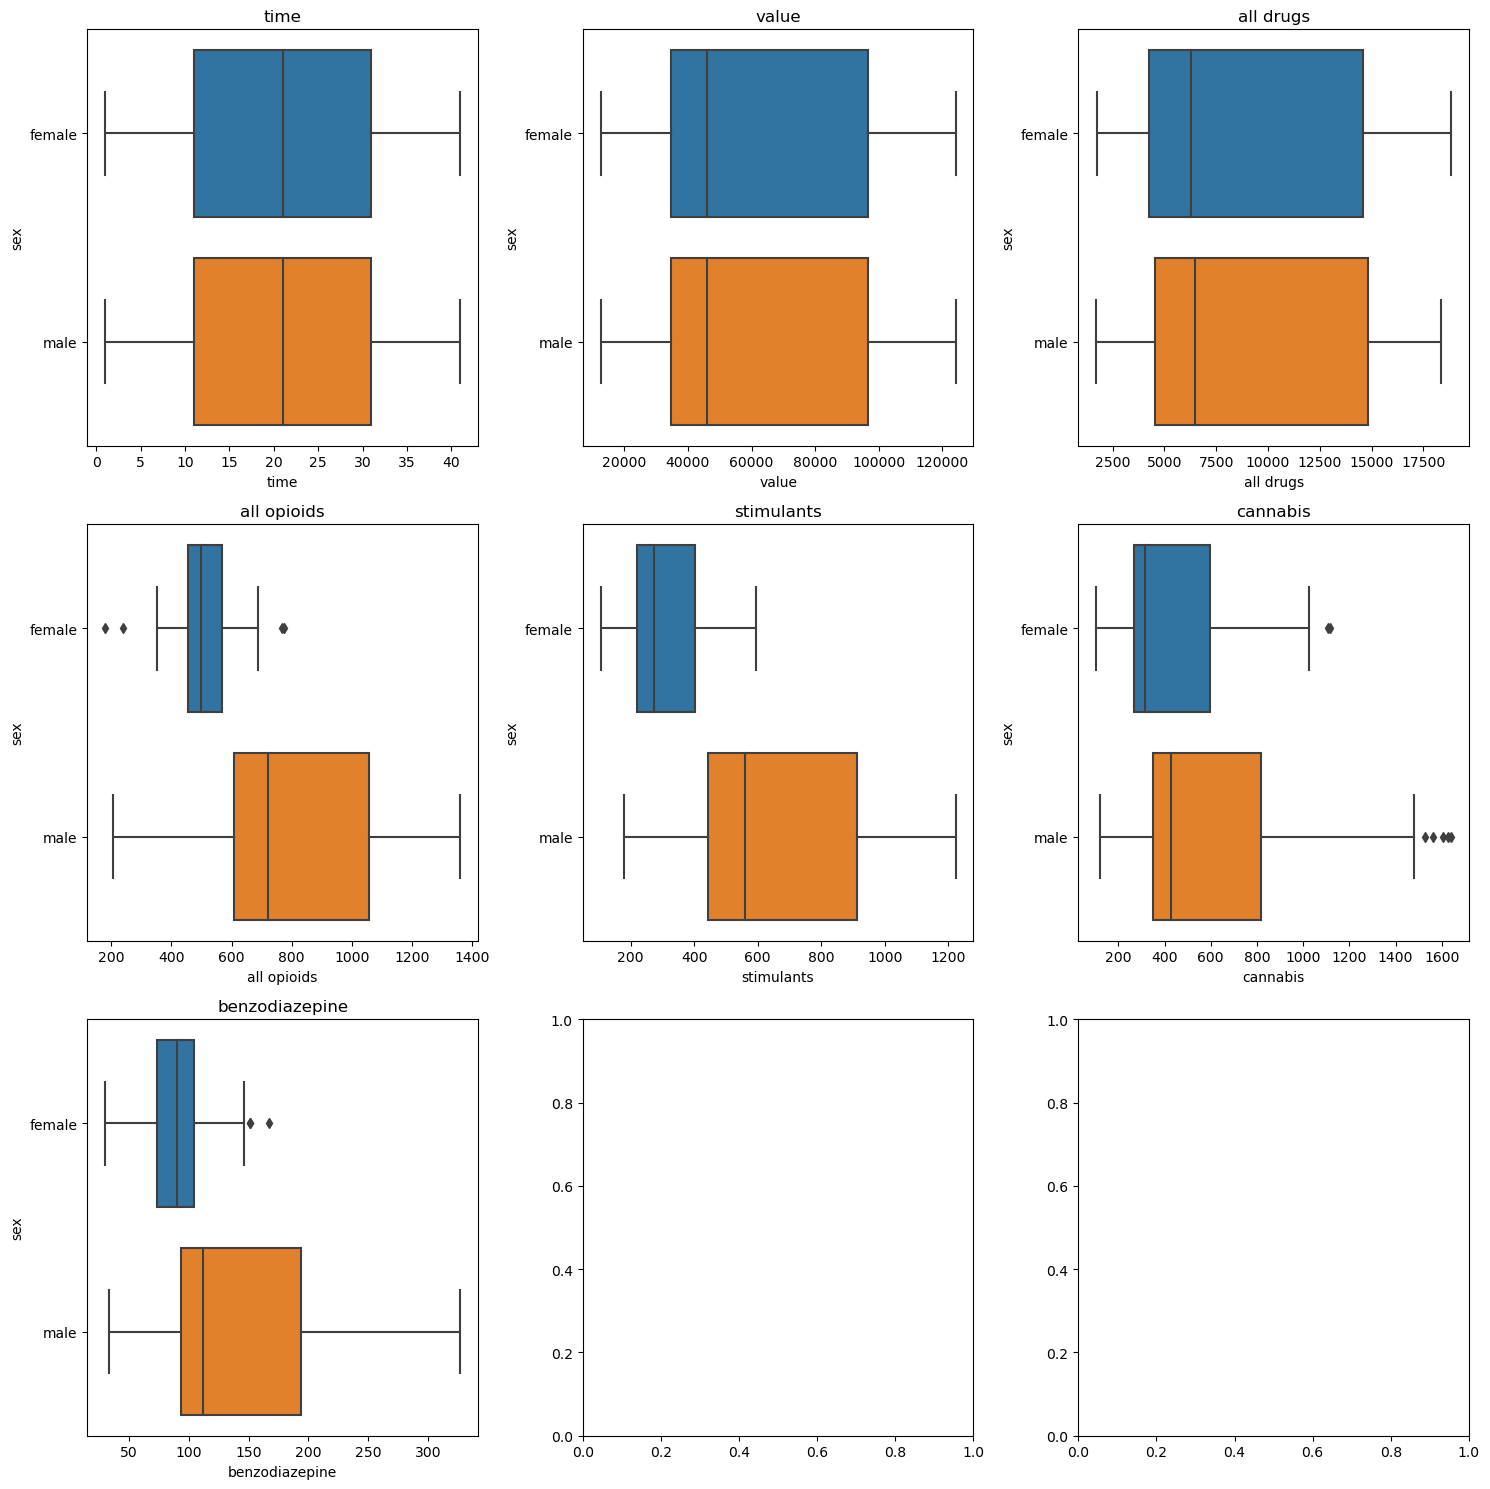

In [ ]:
multivariant_analysis(drug_sex_df, 'sex', 'box')

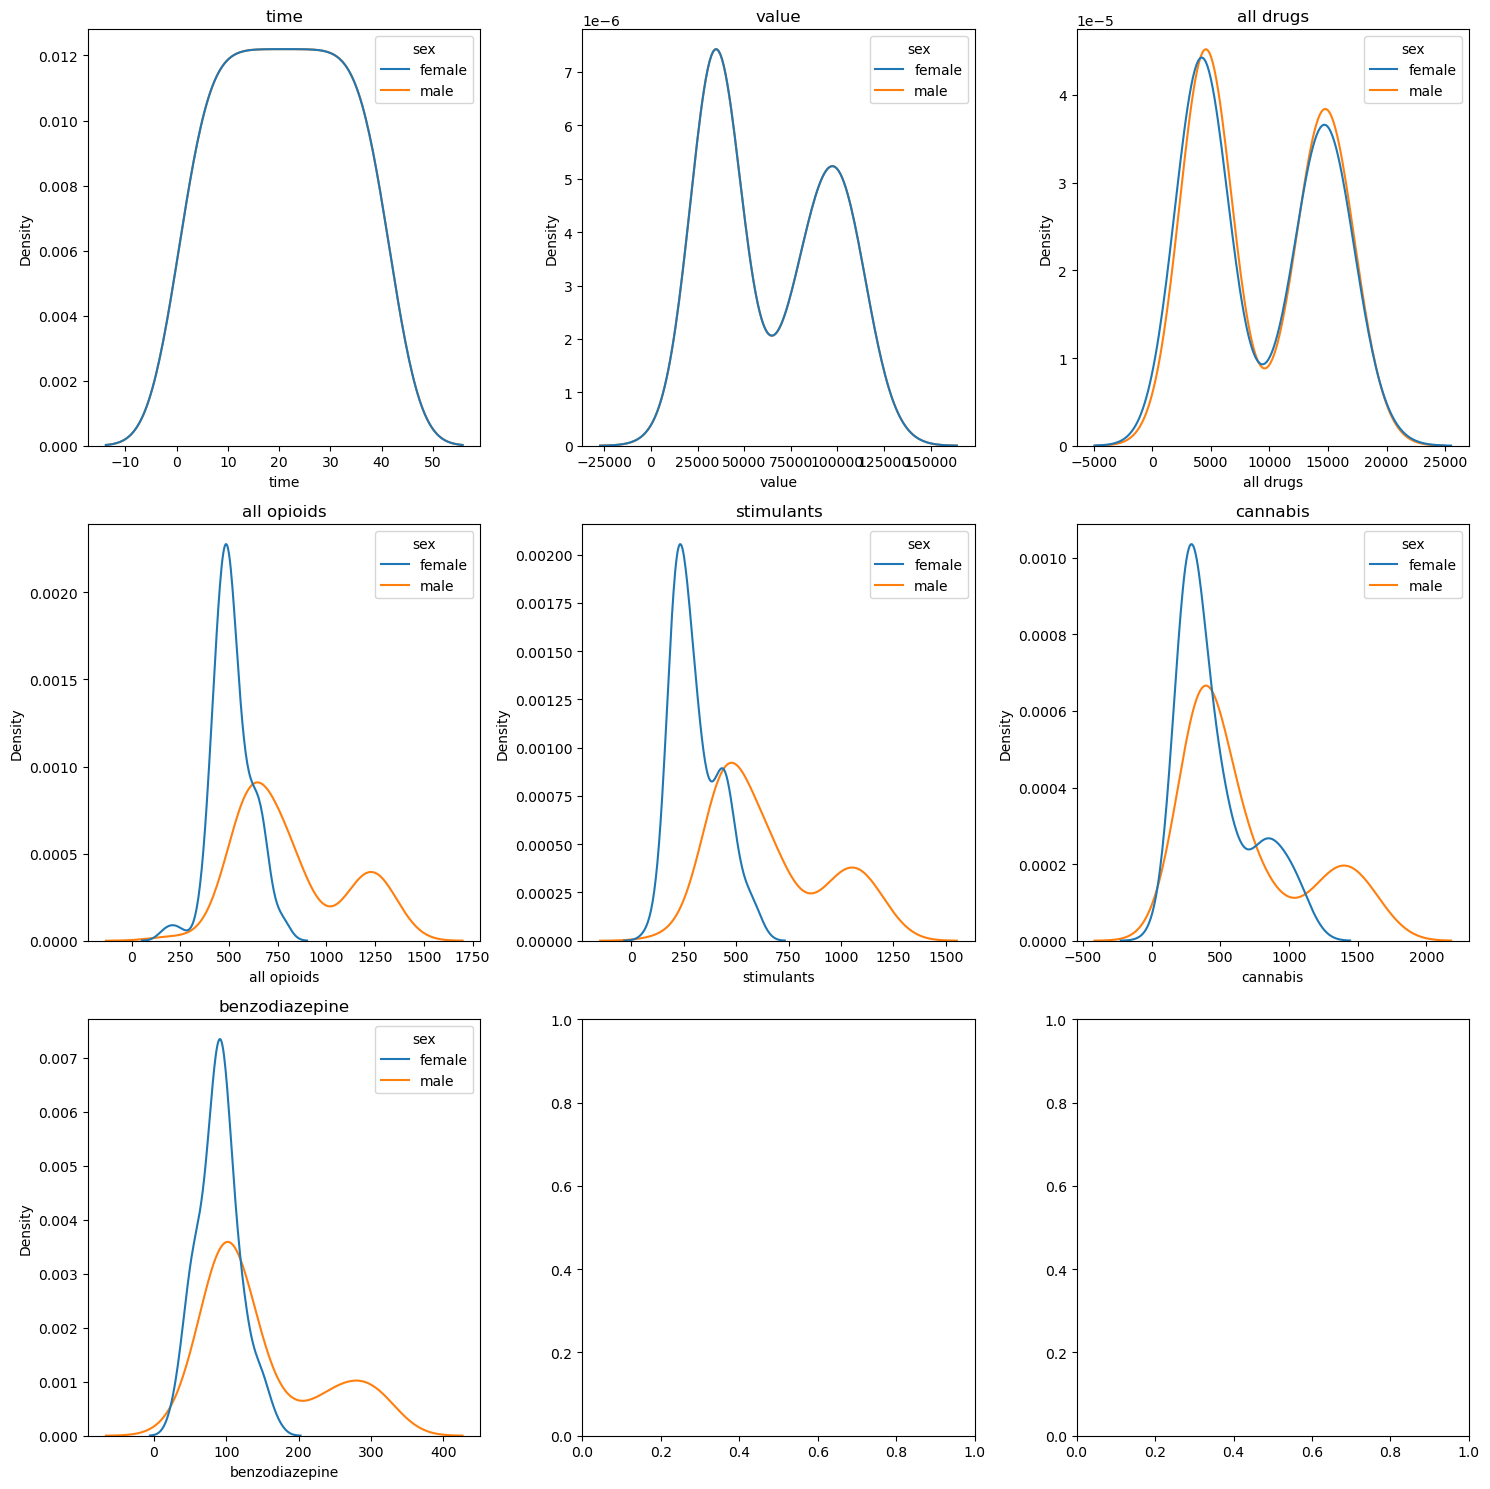

In [ ]:
multivariant_analysis(drug_sex_df, 'sex', 'kde')

IndexError: index 6 is out of bounds for axis 0 with size 6

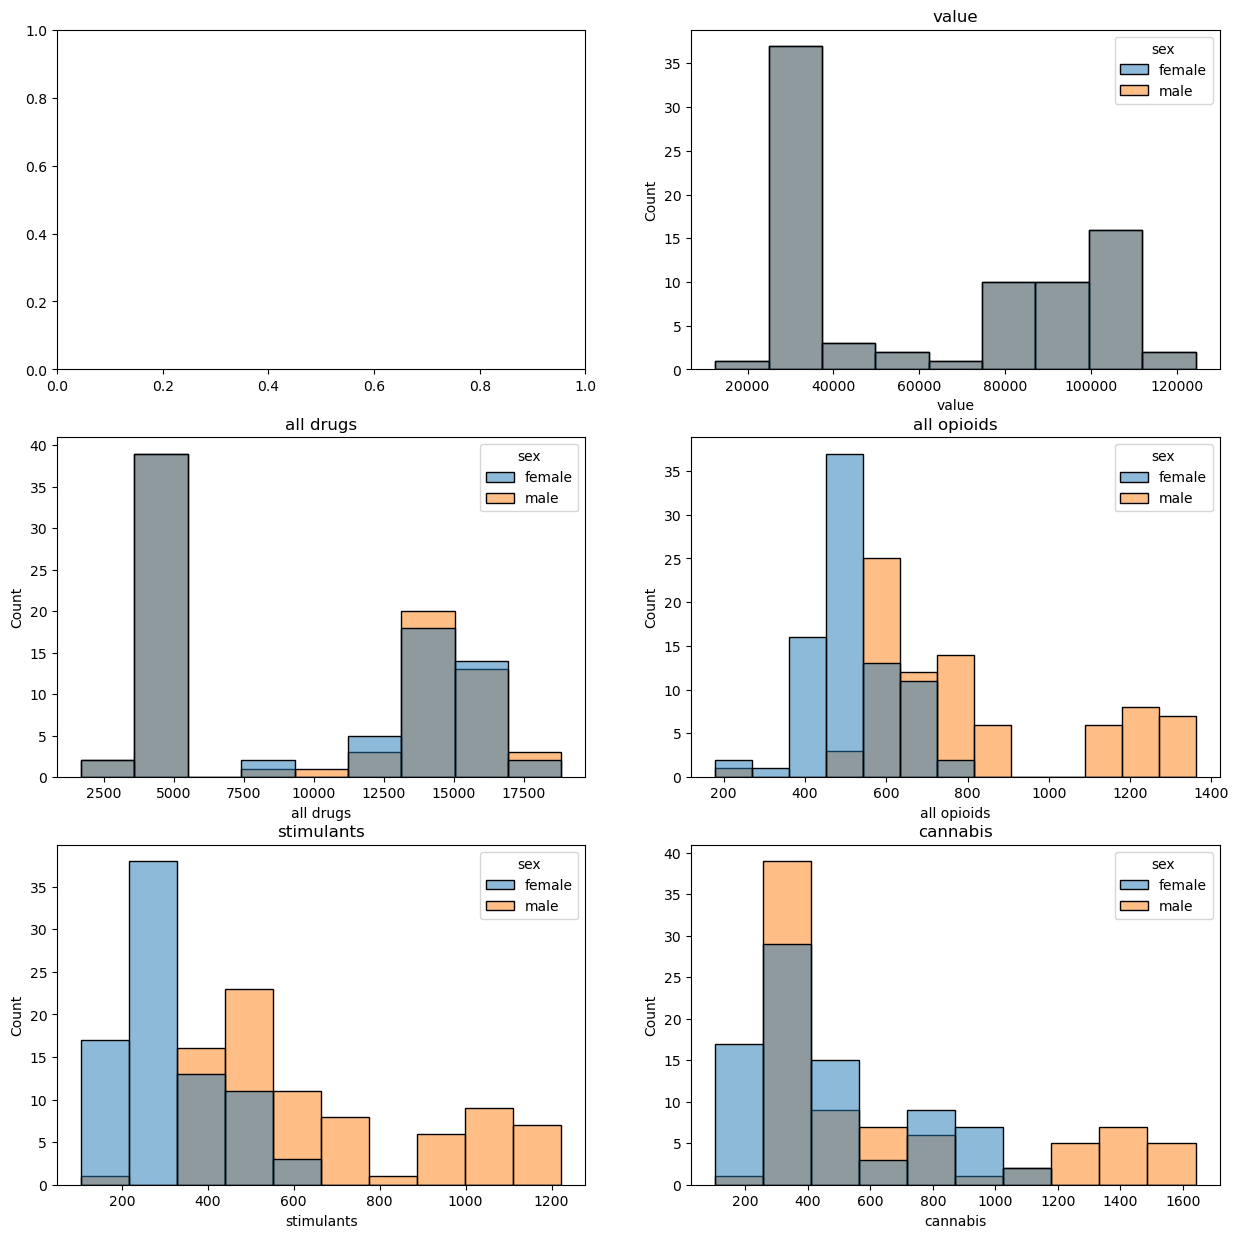

In [ ]:
multivariant_analysis(drug_sex_df, 'sex', 'hist')

In [ ]:
drug_sex_df.head()

,sex,time,start_time,end_time,value,setting,all drugs,all opioids,stimulants,cannabis,benzodiazepine
0,female,1,01/01/2020,01/31/2020,38478.0,ip,4812.0,583.0,230.0,303.0,91.0
1,female,1,01/01/2020,01/31/2020,124275.0,ed,18839.0,767.0,580.0,1116.0,151.0
2,male,1,01/01/2020,01/31/2020,38478.0,ip,5482.0,778.0,537.0,446.0,154.0
3,male,1,01/01/2020,01/31/2020,124275.0,ed,18367.0,1304.0,1181.0,1641.0,291.0
4,female,2,02/01/2020,02/29/2020,35754.0,ip,4659.0,630.0,236.0,280.0,99.0


In [30]:
drug_sex_df.tail()

,sex,time,start_time,end_time,value,setting,all drugs,all opioids,stimulants,cannabis,benzodiazepine
159,male,40,04/01/2023,04/30/2023,89142.0,ed,13156.0,776.0,676.0,667.0,85.0
160,female,41,05/01/2023,05/27/2023,12461.0,ip,1736.0,179.0,105.0,103.0,32.0
161,female,41,05/01/2023,05/27/2023,54008.0,ed,7765.0,240.0,158.0,277.0,30.0
162,male,41,05/01/2023,05/27/2023,12461.0,ip,1692.0,205.0,180.0,122.0,40.0
163,male,41,05/01/2023,05/27/2023,54008.0,ed,7497.0,461.0,361.0,346.0,33.0


In [42]:
correlation, p_val_time = stats.pearsonr(drug_sex_df['time'], drug_sex_df['all drugs'])
print(correlation, p_val_time)


-0.05226785515324236 0.5062488453355134


In [48]:
# test_df = drug_sex_df.copy()
# test_df['sex'].replace({'male': 2.0, 'female': 1.0}, inplace=True)

# test_df.head()

,sex,time,start_time,end_time,value,setting,all drugs
0,1,1,01/01/2020,01/31/2020,38478.0,ip,4812.0
1,1,1,01/01/2020,01/31/2020,124275.0,ed,18839.0
2,2,1,01/01/2020,01/31/2020,38478.0,ip,5482.0
3,2,1,01/01/2020,01/31/2020,124275.0,ed,18367.0
4,1,2,02/01/2020,02/29/2020,35754.0,ip,4659.0


In [47]:
# correlation, p_val_time = stats.pearsonr(drug_sex_df['sex'], drug_sex_df['all drugs'])
# print(correlation, p_val_time)

TypeError: unsupported operand type(s) for +: 'float' and 'str'